In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\vikas'

In [3]:
os.chdir("D:\\WORK\\Data Science\\ML- PROJECTS\\SUV Predictions\\archive")

In [4]:
import pandas as pd

suv_data= pd.read_csv("suv_data.csv")

In [5]:
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math

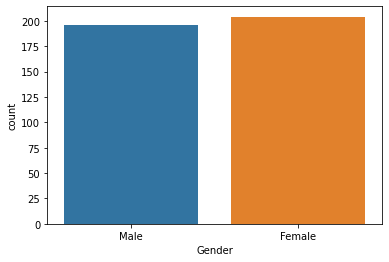

In [8]:
sns.countplot(x= "Gender", data= suv_data)
plt.show()

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

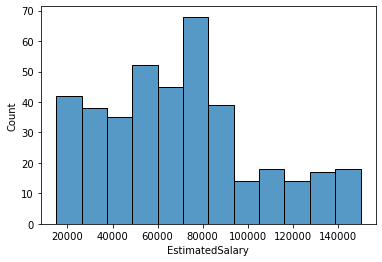

In [9]:
sns.histplot(suv_data['EstimatedSalary'])

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
std_scaler= StandardScaler()

std_data= std_scaler.fit_transform(suv_data.iloc[:, [2,3]])

In [12]:
std_data

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [13]:
std_data= pd.DataFrame(data= std_data, columns= (suv_data.iloc[:, [2,3]].columns) )

In [14]:
std_data

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [15]:
suv_data.drop('Age', axis=1, inplace= True)

In [16]:
suv_data.drop('EstimatedSalary', axis= 1, inplace= True)

In [17]:
suv_data

,User ID,Gender,Purchased
0,15624510,Male,0
1,15810944,Male,0
2,15668575,Female,0
3,15603246,Female,0
4,15804002,Male,0
...,...,...,...
395,15691863,Female,1
396,15706071,Male,1
397,15654296,Female,1
398,15755018,Male,0


In [18]:
suv_data= pd.concat([suv_data, std_data], axis= 1)

In [19]:
suv_data

,User ID,Gender,Purchased,Age,EstimatedSalary
0,15624510,Male,0,-1.781797,-1.490046
1,15810944,Male,0,-0.253587,-1.460681
2,15668575,Female,0,-1.113206,-0.785290
3,15603246,Female,0,-1.017692,-0.374182
4,15804002,Male,0,-1.781797,0.183751
...,...,...,...,...,...
395,15691863,Female,1,0.797057,-0.844019
396,15706071,Male,1,1.274623,-1.372587
397,15654296,Female,1,1.179110,-1.460681
398,15755018,Male,0,-0.158074,-1.078938


In [20]:
gender= pd.get_dummies(suv_data['Gender'], drop_first= True)

In [21]:
gender= pd.DataFrame(gender)

In [22]:
gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [23]:
train_data= pd.concat([suv_data, gender], axis=1)

In [24]:
train_data

,User ID,Gender,Purchased,Age,EstimatedSalary,Male
0,15624510,Male,0,-1.781797,-1.490046,1
1,15810944,Male,0,-0.253587,-1.460681,1
2,15668575,Female,0,-1.113206,-0.785290,0
3,15603246,Female,0,-1.017692,-0.374182,0
4,15804002,Male,0,-1.781797,0.183751,1
...,...,...,...,...,...,...
395,15691863,Female,1,0.797057,-0.844019,0
396,15706071,Male,1,1.274623,-1.372587,1
397,15654296,Female,1,1.179110,-1.460681,0
398,15755018,Male,0,-0.158074,-1.078938,1


In [25]:
train_data.drop(['Gender', 'User ID'], axis= 1, inplace= True)

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit


split= StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)

for train_index, test_index in split.split(train_data, train_data['Male']):
    strat_train_set= train_data.iloc[train_index]
    strat_test_set= train_data.iloc[test_index]

In [27]:
strat_train_set

,Purchased,Age,EstimatedSalary,Male
48,1,-0.731153,1.916277,1
126,0,0.415005,-0.139263,1
54,0,-1.017692,-0.344817,0
71,0,-1.304232,-1.255127,0
6,0,-1.017692,0.418669,0
...,...,...,...,...
252,1,0.988083,1.886912,0
58,0,-1.495258,-1.519411,1
363,0,0.415005,0.271845,0
322,0,0.319491,-0.521006,1


In [29]:
X_train= strat_train_set.iloc[:, 1:]

In [31]:
Y_train= strat_train_set.iloc[:, 0]

In [33]:
X_test= strat_test_set.iloc[:, 1:]

Y_test= strat_test_set.iloc[:, 0]

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_model= LogisticRegression()

log_model.fit(X_train, Y_train)

LogisticRegression()

In [36]:
predictions= log_model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
print(accuracy_score(Y_test, predictions))

0.875
